## This tutorial follows a basic machine learning workflow:

# Examine and understand data
1. Build an input pipeline
2. Build the model
3. Train the model
4. Test the model
5. Improve the model and repeat the process

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
#  Load data 

In [3]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('D:/ProjectsDL/TF2/TF2Tutorial/cats_and_dogs.zip', origin=_URL, extract=True)
print("path_to_zip", path_to_zip)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered') # delete file and return the folder of the file
print("PATH:", PATH)

path_to_zip D:/ProjectsDL/TF2/TF2Tutorial/cats_and_dogs.zip
PATH: D:/ProjectsDL/TF2/TF2Tutorial\cats_and_dogs_filtered


In [4]:
# define train and val dirs' paths , need to upzip the file and make sure the train and validation folder as printed result
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
print("train_dir", train_dir)
print("validation_dir", validation_dir)

train_dir D:/ProjectsDL/TF2/TF2Tutorial\cats_and_dogs_filtered\train
validation_dir D:/ProjectsDL/TF2/TF2Tutorial\cats_and_dogs_filtered\validation


In [5]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures 

print("train_cats_dir:",train_cats_dir)
print("train_dogs_dir:",train_dogs_dir)
print("validation_cats_dir:",validation_cats_dir)
print("validation_dogs_dir:",validation_dogs_dir)

train_cats_dir: D:/ProjectsDL/TF2/TF2Tutorial\cats_and_dogs_filtered\train\cats
train_dogs_dir: D:/ProjectsDL/TF2/TF2Tutorial\cats_and_dogs_filtered\train\dogs
validation_cats_dir: D:/ProjectsDL/TF2/TF2Tutorial\cats_and_dogs_filtered\validation\cats
validation_dogs_dir: D:/ProjectsDL/TF2/TF2Tutorial\cats_and_dogs_filtered\validation\dogs


# Understand the data
Let's look at how many cats and dogs images are in the training and validation directory:

In [6]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val


print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [7]:
# For convenience, set up variables to use while pre-processing the dataset and training the network. 

batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Format the images into appropriately pre-processed floating point tensors before feeding to the network:

1. Read images from the disk.
2. Decode contents of these images and convert it into proper grid format as per their RGB content.
3. Convert them into floating point tensors.
4. Rescale the tensors from values between 0 and 255 to values between 0 and 1, as neural networks prefer to deal with small input values.

Fortunately, all these tasks can be done with the `ImageDataGenerator` class provided by `tf.keras`. It can read images from disk and preprocess them into proper tensors. It will also set up generators that convert these images into batches of tensors—helpful when training the network.

In [8]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [9]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Visualize training images

Visualize the training images by extracting a batch of images from the training generator—which is 32 images in this example—then plot five of them with `matplotlib`.

In [10]:
! pip install pillow 
# when Load image from generator， the PIL（pillow） package needed， otherwise this --？ ImportError: Could not import PIL.Image. The use of `load_img` requires PIL. 
sample_training_images, _ = next(train_data_gen)
print("one batch shape:",sample_training_images.shape)

one batch shape: (128, 150, 150, 3)


In [11]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures 

print("train_cats_dir:",train_cats_dir)
print("train_dogs_dir:",train_dogs_dir)
print("validation_cats_dir:",validation_cats_dir)
print("validation_dogs_dir:",validation_dogs_dir)

train_cats_dir: D:/ProjectsDL/TF2/TF2Tutorial\cats_and_dogs_filtered\train\cats
train_dogs_dir: D:/ProjectsDL/TF2/TF2Tutorial\cats_and_dogs_filtered\train\dogs
validation_cats_dir: D:/ProjectsDL/TF2/TF2Tutorial\cats_and_dogs_filtered\validation\cats
validation_dogs_dir: D:/ProjectsDL/TF2/TF2Tutorial\cats_and_dogs_filtered\validation\dogs


# Understand the data
Let's look at how many cats and dogs images are in the training and validation directory:

In [12]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val


print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [13]:
# For convenience, set up variables to use while pre-processing the dataset and training the network. 

batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Format the images into appropriately pre-processed floating point tensors before feeding to the network:

1. Read images from the disk.
2. Decode contents of these images and convert it into proper grid format as per their RGB content.
3. Convert them into floating point tensors.
4. Rescale the tensors from values between 0 and 255 to values between 0 and 1, as neural networks prefer to deal with small input values.

Fortunately, all these tasks can be done with the `ImageDataGenerator` class provided by `tf.keras`. It can read images from disk and preprocess them into proper tensors. It will also set up generators that convert these images into batches of tensors—helpful when training the network.

In [14]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [15]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Visualize training images

Visualize the training images by extracting a batch of images from the training generator—which is 32（128 actually not 32 , be.batchsize =  128） images in this example—then plot five of them with `matplotlib`.

The next function returns a batch from the dataset. The return value of next function is in form of (x_train, y_train) where x_train is training features and y_train, its labels. Discard the labels to only visualize the training images.

In [18]:
! pip install pillow 
# need to restart kenerl after installation
# when Load image from generator， the PIL（pillow） package needed， otherwise this --？ ImportError: Could not import PIL.Image. The use of `load_img` requires PIL. 
sample_training_images, _ = next(train_data_gen)
print("one batch shape:",sample_training_images.shape)

one batch shape: (128, 150, 150, 3)


In [19]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

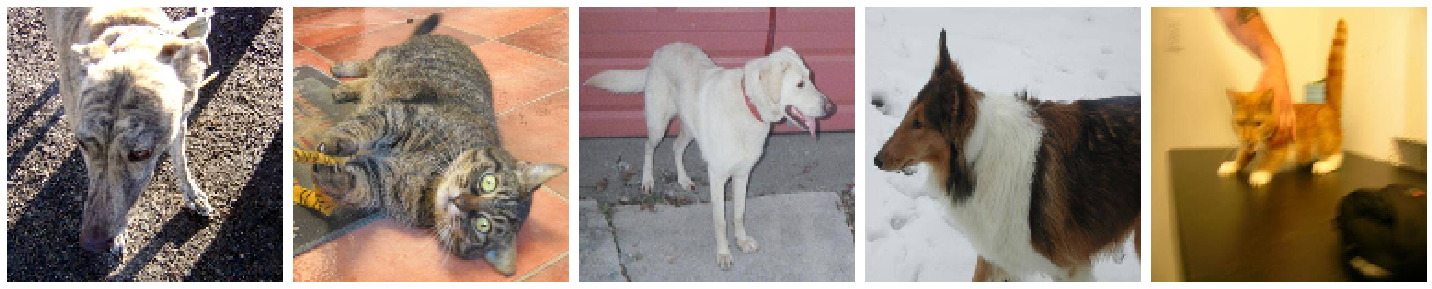

In [20]:
plotImages(sample_training_images[:5])

## Create the model

The model consists of three convolution blocks with a max pool layer in each of them. There's a fully connected layer with 512 units on top of it that is activated by a `relu` activation function.

In [21]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

### Compile the model

For this tutorial, choose the *ADAM* optimizer and *binary cross entropy* loss function. To view training and validation accuracy for each training epoch, pass the `metrics` argument.

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Model summary

View all the layers of the network using the model's `summary` method:

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

### Train the model

Use the `fit_generator` method of the `ImageDataGenerator` class to train the network.

In [25]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 15 steps, validate for 7 steps
Epoch 1/15
15/15 [==============================] - 18s 1s/step - loss: 1.1626 - accuracy: 0.5011 - val_loss: 0.6927 - val_accuracy: 0.5033
Epoch 2/15
15/15 [==============================] - 18s 1s/step - loss: 0.6893 - accuracy: 0.5043 - val_loss: 0.6829 - val_accuracy: 0.5357
Epoch 3/15
15/15 [==============================] - 19s 1s/step - loss: 0.6681 - accuracy: 0.5572 - val_loss: 0.6408 - val_accuracy: 0.6004
Epoch 4/15
15/15 [==============================] - 19s 1s/step - loss: 0.6152 - accuracy: 0.6416 - val_loss: 0.6017 - val_accuracy: 0.6429
Epoch 5/15
15/15 [==============================] - 18s 1s/step - loss: 0.5695 - accuracy: 0.6683 - val_loss: 0.6023 - val_accuracy: 0.6931
Epoch 6/15
15/15 [==============================] - 19s 1s/step - loss: 0.5249 - accuracy: 0.7222 - val_loss: 0.6093 - val_accuracy: 

### Visualize training results

Now visualize the results after training the network.

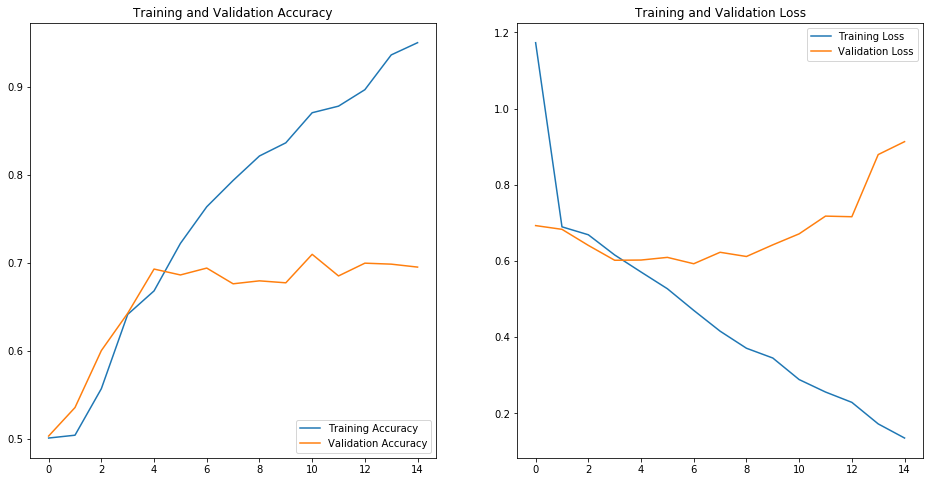

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

As you can see from the plots, training accuracy and validation accuracy are off by large margin and the model has achieved only around **70%** accuracy on the validation set.

Let's look at what went wrong and try to increase overall performance of the model.

## Overfitting


In the plots above, the training accuracy is increasing linearly over time, whereas validation accuracy stalls around 70% in the training process. Also, the difference in accuracy between training and validation accuracy is noticeable—a sign of *overfitting*.

When there are a small number of training examples, the model sometimes learns from noises or unwanted details from training examples—to an extent that it negatively impacts the performance of the model on new examples. This phenomenon is known as overfitting. It means that the model will have a difficult time generalizing on a new dataset.

There are multiple ways to fight overfitting in the training process. In this tutorial, you'll use *data augmentation* and add *dropout* to our model.

## Data augmentation


Overfitting generally occurs when there are a small number of training examples. One way to fix this problem is to augment the dataset so that it has a sufficient number of training examples. Data augmentation takes the approach of generating more training data from existing training samples by augmenting the samples using random transformations that yield believable-looking images. The goal is the model will never see the exact same picture twice during training. This helps expose the model to more aspects of the data and generalize better.

Implement this in `tf.keras` using the `ImageDataGenerator` class. Pass  different transformations to the dataset and it will take care of applying it during the training process.

### Augment and visualize data

Pass `horizontal_flip` as an argument to the `ImageDataGenerator` class and set it to `True` to apply this augmentation.

In [32]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [48]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))
print("train_data_gen", train_data_gen)
print("take the first batch, train_data_gen[0]:\n", train_data_gen[0]) 
print("take the first batch, train_data_gen[0] len:\n", len(train_data_gen[0])) 
#  train_data_ gen returns num of batches (train_X, train_Y) , train_data_gene[0]  return the first batch
print("take the train batch without label of the fisrt batch, train_data_gen[0][0]:\n", train_data_gen[0][0]) 
print("take the first image of the first train batch without label, train_data_gen[0][0]:\n", train_data_gen[0][0][0]) 
print("take the first image of the first train batch without label-shape:, train_data_gen[0][0][0].shape:\m", train_data_gen[0][0][0].shape) 

Found 2000 images belonging to 2 classes.
train_data_gen <keras_preprocessing.image.directory_iterator.DirectoryIterator object at 0x0000022706431548>
take the first batch, train_data_gen[0]:
 (array([[[[0.29803923, 0.4431373 , 0.14117648],
         [0.2901961 , 0.43529415, 0.12941177],
         [0.29411766, 0.43921572, 0.13333334],
         ...,
         [0.3803922 , 0.53333336, 0.1764706 ],
         [0.37254903, 0.52156866, 0.18039216],
         [0.38823533, 0.5372549 , 0.20392159]],

        [[0.2784314 , 0.42352945, 0.12156864],
         [0.28235295, 0.427451  , 0.12156864],
         [0.29411766, 0.43921572, 0.13333334],
         ...,
         [0.36862746, 0.52156866, 0.16470589],
         [0.3803922 , 0.5294118 , 0.18823531],
         [0.34901962, 0.49803925, 0.16470589]],

        [[0.28627452, 0.43529415, 0.13333334],
         [0.2784314 , 0.42352945, 0.12156864],
         [0.2901961 , 0.43529415, 0.13333334],
         ...,
         [0.34509805, 0.49803925, 0.14117648],
        

Take one sample image from the training examples and repeat it five times so that the augmentation is applied to the same image five times.

In [34]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

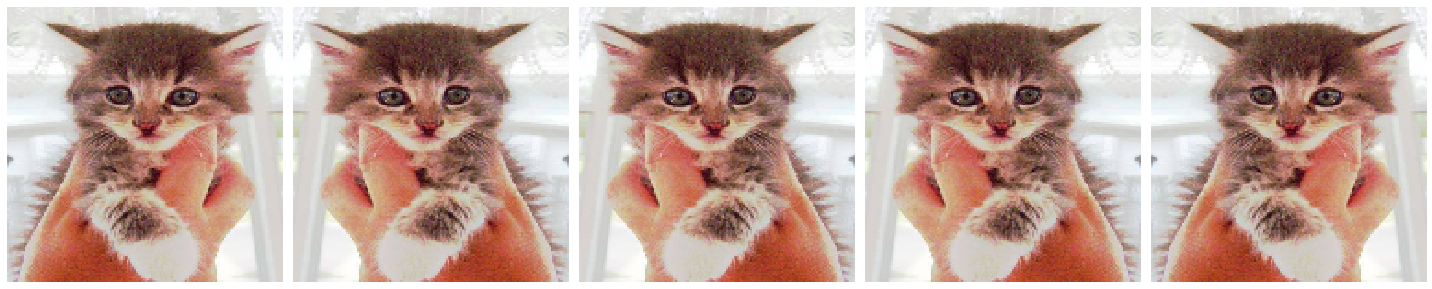

In [35]:
# Re-use the same custom plotting function defined and used
# above to visualize the training images
plotImages(augmented_images)

### Randomly rotate the image

Let's take a look at a different augmentation called rotation and apply 45 degrees of rotation randomly to the training examples.

In [49]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [50]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.


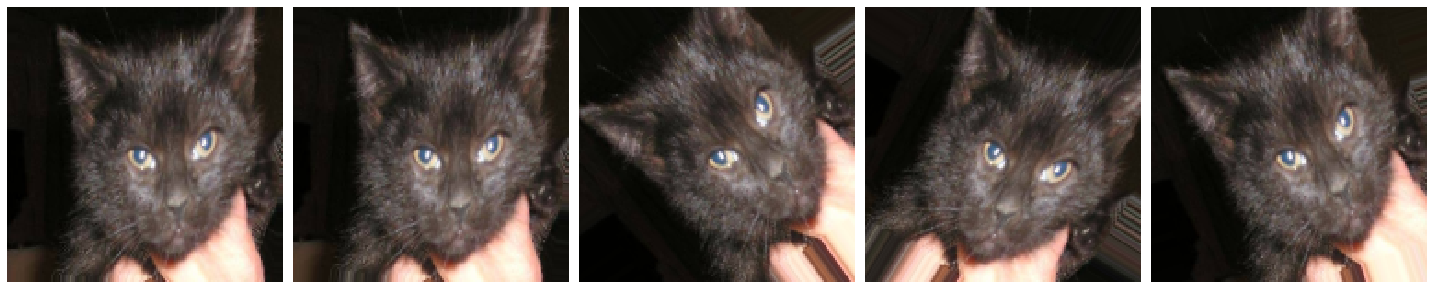

In [51]:
plotImages(augmented_images)

### Apply zoom augmentation

Apply a zoom augmentation to the dataset to zoom images up to 50% randomly.

In [56]:
# zoom_range from 0 - 1 where 1 = 100%.
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5) # 

In [57]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.


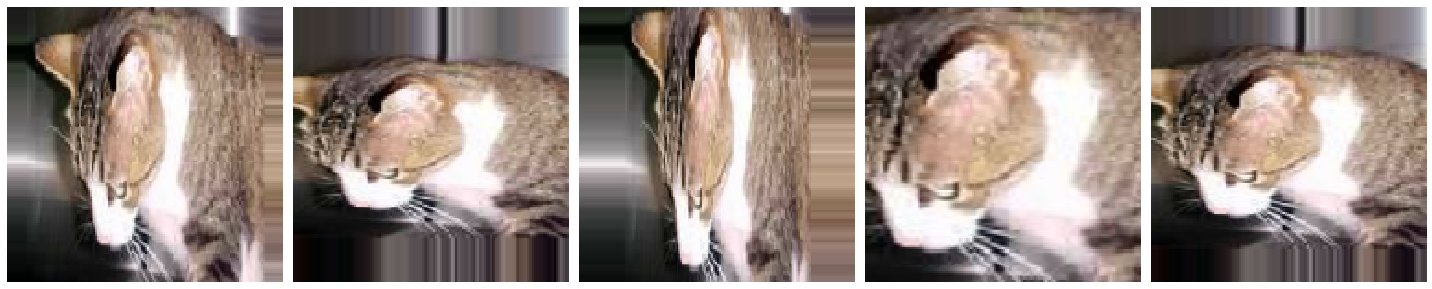

In [58]:
plotImages(augmented_images)

### Put it all together

Apply all the previous augmentations. Here, you applied rescale, 45 degree rotation, width shift, height shift, horizontal flip and zoom augmentation to the training images.

In [62]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [63]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


Visualize how a single image would look five different times when passing these augmentations randomly to the dataset.

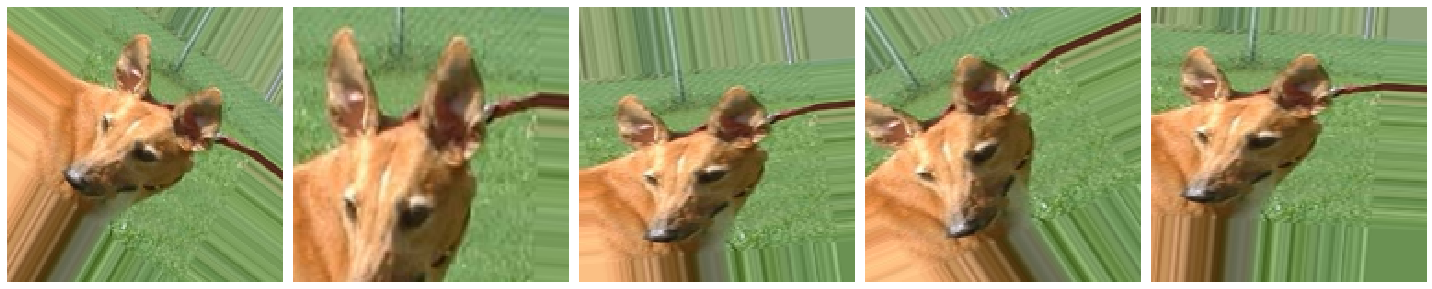

In [65]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Create validation data generator

Generally, only apply data augmentation to the training examples. In this case, only rescale the validation images and convert them into batches using `ImageDataGenerator`.

In [66]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [67]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


## Dropout

Another technique to reduce overfitting is to introduce *dropout* to the network. It is a form of *regularization* that forces the weights in the network to take only small values, which makes the distribution of weight values more regular and the network can reduce overfitting on small training examples. Dropout is one of the regularization technique used in this tutorial

When you apply dropout to a layer it randomly drops out (set to zero) number of output units from the applied layer during the training process. Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 20% or 40% of the output units randomly from the applied layer.

When appling 0.1 dropout to a certain layer, it randomly kills 10% of the output units in each training epoch.

Create a network architecture with this new dropout feature and apply it to different convolutions and fully-connected layers.

## Creating a new network with Dropouts

Here, you apply dropout to first and last max pool layers. Applying dropout will randomly set 20% of the neurons to zero during each training epoch. This helps to avoid overfitting on the training dataset.

In [68]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

### Compile the model

After introducing dropouts to the network, compile the model and view the layers summary.

In [69]:
model_new.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

model_new.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)       

### Train the model

After successfully introducing data augmentations to the training examples and adding dropouts to the network, train this new network:

In [70]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 15 steps, validate for 7 steps
Epoch 1/15
15/15 [==============================] - 28s 2s/step - loss: 1.0356 - accuracy: 0.4888 - val_loss: 0.6935 - val_accuracy: 0.5033
Epoch 2/15
15/15 [==============================] - 28s 2s/step - loss: 0.6930 - accuracy: 0.5005 - val_loss: 0.6909 - val_accuracy: 0.5033
Epoch 3/15
15/15 [==============================] - 26s 2s/step - loss: 0.6871 - accuracy: 0.5085 - val_loss: 0.6799 - val_accuracy: 0.5123
Epoch 4/15
15/15 [==============================] - 26s 2s/step - loss: 0.6828 - accuracy: 0.5278 - val_loss: 0.6680 - val_accuracy: 0.5525
Epoch 5/15
15/15 [==============================] - 27s 2s/step - loss: 0.6739 - accuracy: 0.5411 - val_loss: 0.6589 - val_accuracy: 0.5636
Epoch 6/15
15/15 [==============================] - 25s 2s/step - loss: 0.6660 - accuracy: 0.5657 - val_loss: 0.6486 - val_accuracy: 0.5993
Epoch 7/15
15/15 [==============================] - 25s 2s/step - los

### Visualize the model

Visualize the new model after training, you can see that there is significantly less overfitting than before. The accuracy should go up after training the model for more epochs.

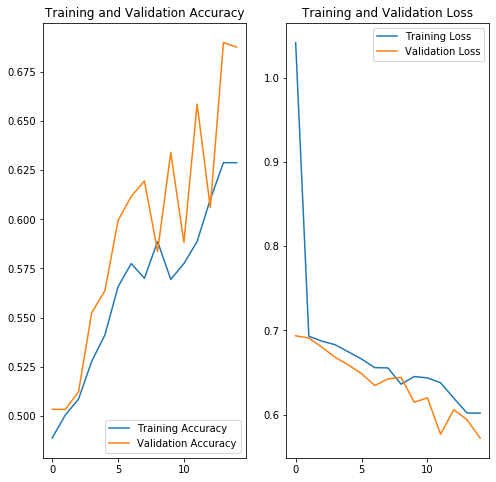

In [74]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [75]:
### train the model with longer epochs
history2 = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs*2,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 15 steps, validate for 7 steps
Epoch 1/30
15/15 [==============================] - 25s 2s/step - loss: 0.5848 - accuracy: 0.6672 - val_loss: 0.5748 - val_accuracy: 0.6786
Epoch 2/30
15/15 [==============================] - 25s 2s/step - loss: 0.5960 - accuracy: 0.6287 - val_loss: 0.5655 - val_accuracy: 0.6585
Epoch 3/30
15/15 [==============================] - 25s 2s/step - loss: 0.5924 - accuracy: 0.6351 - val_loss: 0.5607 - val_accuracy: 0.7031
Epoch 4/30
15/15 [==============================] - 25s 2s/step - loss: 0.5783 - accuracy: 0.6469 - val_loss: 0.6097 - val_accuracy: 0.6708
Epoch 5/30
15/15 [==============================] - 25s 2s/step - loss: 0.5716 - accuracy: 0.6699 - val_loss: 0.5589 - val_accuracy: 0.6998
Epoch 6/30
15/15 [==============================] - 25s 2s/step - loss: 0.5680 - accuracy: 0.6565 - val_loss: 0.5450 - val_accuracy: 0.7098
Epoch 7/30
15/15 [==============================] - 25s 2s/step - los

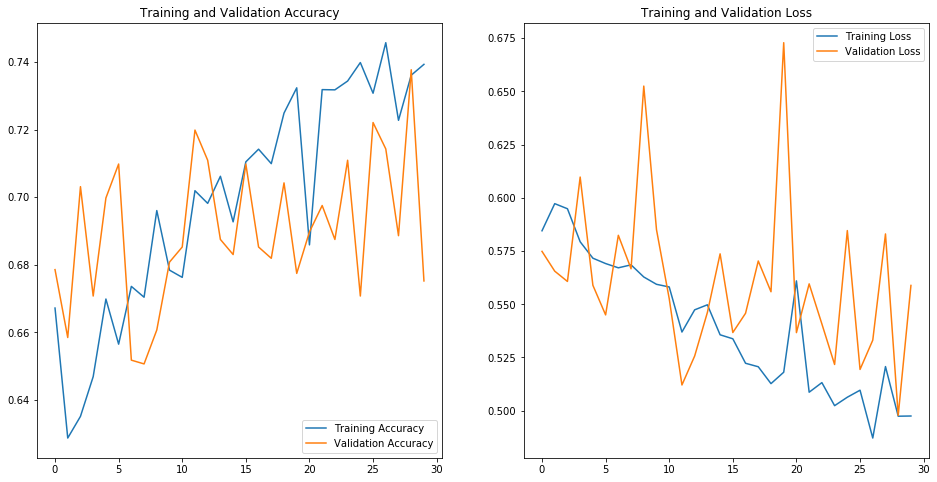

In [77]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs*2)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()